In [3]:
!pip install python-binance

  Using cached python_binance-1.0.15-py2.py3-none-any.whl (63 kB)
  Using cached websockets-9.1-cp38-cp38-win_amd64.whl (90 kB)


In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
from binance.client import Client
from config import *

In [3]:
client = Client(api_key, api_secret)

In [106]:
client.futures_historical_klines?

In [95]:
def test_serie(S):
    # ext_mean = np.mean([S[0], S[-1]])
    ext_mean = float(S[-1])
    min_vals = S[S<ext_mean]
    max_vals = S[S>ext_mean]
    balance = [min_vals.shape[0], max_vals.shape[0]]
    evaluar = f"{min_vals.shape[0]}/{S.shape[0]}"
    metrica = eval(evaluar)
    print(balance, evaluar, metrica)
    
    khe = ''
    if balance[0]>balance[1]:
        khe = 'down'
    else:
        khe = 'up'
    
    pasa = 0
    # S, pasa = test_dist(S, khe)
        
    # if metrica<.11 and pasa==1: ### para entrenar el modelo
    if metrica<.105:               ### para emplear en campo
        return 1, S, khe
    else:
        return 0, S, khe

In [8]:
%%timeit
L3m = client.futures_historical_klines(
    symbol='DOGEUSDT',
    interval='1m',
    start_str='12-02-2021 20:15:00',
    end_str='12-02-2021 23:35:00',
    # limit=40
)

1.29 s ± 253 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit
L3m = client.futures_historical_klines(
    symbol='DOGEUSDT',
    interval='3m',
    start_str='12-02-2021 20:15:00',
    end_str='12-02-2021 23:35:00',
    # limit=40
)

725 ms ± 253 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
%%timeit
L3m = client.futures_historical_klines(
    symbol='DOGEUSDT',
    interval='5m',
    start_str='12-02-2021 20:15:00',
    end_str='12-02-2021 23:35:00',
    # limit=40
)

1.08 s ± 332 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [105]:
L3m = client.futures_historical_klines(
    symbol='DOGEUSDT',
    interval='5m',
    start_str='12-02-2021 20:00:00',
    end_str='12-02-2021 23:18:00',
    # limit=40
                                       )
arr = np.array(L3m).astype(np.float64)
index = pd.DatetimeIndex(pd.to_datetime(arr[:, 0], unit='ms'))#.tz_localize('UTC')#.tz_convert('America/Lima')
df_serie = pd.DataFrame(arr[:, 4], index=index)
S = np.array(df_serie[0])

In [106]:
len(L3m), 100*(S[-1]-S[0])/S[0]

(40, 0.562581141510797)

In [3]:
import json
L = [1, 2, 3]
jL = str(L)
jL = '['+jL+','+jL+']'
jL

'[[1, 2, 3],[1, 2, 3]]'

In [ ]:
def actualizar_lista_json(nombre, new_list):
    data = open(nombre)
    info = data.readlines()[0].replace('"', '')
    data.close()
    lista_values = json.loads(info)
    lista_values.append(new_list)
    return lista_values

In [189]:
with open('data.json', 'w') as f:
    json.dump(jL, f)
f.close()

In [240]:
data = open('datas_temp.json')
info = data.readlines()#[0].replace('"', '')
data.close()
info

[]

In [205]:
aList = json.loads(info)
aList.append([3, 4, 5])

In [242]:
list_str = json.dumps(aList)
list_str

'[[1, 2, 3], [1, 2, 3], [3, 4, 5]]'

In [207]:
with open('dataZ.json', 'w') as f:
    json.dump(list_str, f)
f.close()

In [ ]:
def actualizar_lista_json(nombre, new_list):
    data = open(nombre)
    info = data.readlines()[0].replace('"', '')
    data.close()
    lista_values = json.loads(info)
    lista_values.append(new_list)
    return lista_values

In [251]:
data = open('a.json')
info = data.readlines()[0]
info

'[[1, 2]]'

In [252]:
# info = info.replace('"', '')
print(info)
data.close()
lista_values = json.loads(info)
lista_values

[[1, 2]]


[[1, 2]]

In [215]:
info

'[[1, 2, 3], [1, 2, 3], [3, 4, 5]]'

In [217]:
arr = [1, 2, 3, 4, 5, 6, 7, 8, 9]
p_higher = .1
int(round(len(arr)*p_higher), 0)

TypeError: int() can't convert non-string with explicit base

In [218]:
arr = [1, 2, 3, 4, 5, 6, 7, 8, 9]
p_higher = .1
int(round(len(arr)*p_higher, 0))

1

In [102]:
from glob import glob
import json
import os

In [247]:
nuevo_json('a.json', [[1, 2]])

In [136]:
def gen_json(nombre, lista):
    with open(nombre, 'w') as f:
        json.dump(lista, f)
    f.close()

In [137]:
def collect_json(nombre, new_list):
    try:
        data = open(nombre)
        info = data.readlines()[0]#.replace('"', '')
        data.close()
        lista_values = json.loads(info)
        lista_values.append(new_list)
        gen_json(nombre, lista_values)
    except:
        gen_json(nombre, [new_list])

In [192]:
name = 'T3.json'
o = 0
for i in range(15, 20):
    l = list(range(i)) ### lista | type()==list
    # print(l)
    collect_json(name, l)
    if 0%2==0:
        collect_json(name, l)
    else:
        collect_json(name, l)
        # collect_json(name, l)

In [180]:
def get_last_kline(namefile):
    try:
        data = open(namefile)
        info = data.readlines()
        data.close()
        if len(info)>0:
            inf = info[0]#.replace('"', '')
            lista_values = json.loads(inf)
            # print(lista_values)
            return lista_values#[-1]
        else:
            return []
    except:
        return []

In [196]:
lista_k = get_last_kline('T3.json')
# lista_str = [','.join(list(np.array(i, dtype=np.str_))) for i in lista_k]
lista_k
# lista_str

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]]

In [215]:
def get_kline(namefile):
    try:
        lista_k = get_last_kline(namefile)
        WW = {}
        for l in lista_k:
            long = lista_k.count(l)
            if long not in WW:
                WW[long] = [l]
            else:
                WW[long].append(l)
        lens = list(WW.keys())
        lens.sort()
        minimo = lens[0]
        list_w = WW[minimo]
        wes = []
        for i in list_w:
            wes.append([len(i), i])
        wes.sort()
        kline_selection = wes[0][-1]
        return kline_selection
    except:
        return []

In [216]:
get_kline('T3.json')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [213]:
None+None

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [206]:
lista_k = get_last_kline('T3.json')
WW = {}
for l in lista_k:
    long = lista_k.count(l)
    if long not in WW:
        WW[long] = [l]
    else:
        WW[long].append(l)
lens = list(WW.keys())
lens.sort()
minimo = lens[0]
list_w = WW[minimo]
wes = []
for i in list_w:
    wes.append([len(i), i])
wes.sort()
kline_selection = wes[0][-1]
kline_selection

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [109]:
name = 'A.json'
data = open(name)
info = data.readlines()
if len(info)>0:
    inf = info[0]#.replace('"', '')
    lista_values = json.loads(inf)
    print(lista_values)
data.close()

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]], [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]], [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]], [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]]]


In [198]:
t = [3, 2, 4, 1, 5]
t.sort()
t

[1, 2, 3, 4, 5]

In [285]:
glob("coin*")

['coin_2569526.txt']

In [6]:
ejemplo = open("coin_2569526.txt", "r")
lineas = ejemplo.readlines()
ejemplo.close()

In [309]:
D['sell'][1] = [1]
D

{'sell': {1: [1]}, 'buy': {}}

In [52]:
s = open('testep.txt', 'a+')
s.close()

In [55]:
s2 = open('testep.txt', 'r')
lineas = s2.readlines()
s2.close()

In [56]:
lineas

[]

In [81]:
get_buy_info('testep.txt')

[]


[]

In [96]:
%%timeit
ypreds, longitud, buy_mean = get_buy_info('dogetest.txt')
# ypreds, longitud, buy_mean

1.18 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [214]:
ypreds, longitud, buy_mean = get_buy_info('dogetest.txt')
ypreds, longitud, buy_mean

(30, 33, 95.43333333333334)

In [94]:
def get_buy_info(filename):
    try:
        ejemplo = open(filename, "r")
        lineas = ejemplo.readlines()
        ejemplo.close()

        D = {'sell':{}, 'buy':{}}
        if len(lineas)>0:
            for linea in lineas:
                linea_div = linea.strip().split("|")
                linea_div = [zx for zx in linea_div if zx!='']
                klines_n = json.loads(linea_div[2])
                probs = linea_div[3:]
                for i in range(len(klines_n)):
                    kn = klines_n[i]
                    sid_e, p_rob = probs[i].strip()[:-1].split(": ")
                    p_rob = float(p_rob)
                    sid_e = sid_e.lower()
                    if kn not in D[sid_e]:
                        D[sid_e][kn] = [p_rob]
                    else:
                        D[sid_e][kn].append(p_rob)
        d_buy = {}
        for leng in D['buy']:
            list_l = D['buy'][leng]
            d_buy[leng] = [len(list_l), leng, np.array(list_l).mean()]
        arr_buy = [i for i in d_buy.values()]
        # print(arr_buy)
        if len(arr_buy)>0:
            arr_buy.sort()
            # print(arr_buy)
            buy_info = arr_buy[0]
            return buy_info
        else:
            return [None, None, None]
    except:
        return [None, None, None]

In [70]:
def get_buy_info(filename):
    ejemplo = open(filename, "r")
    lineas = ejemplo.readlines()
    ejemplo.close()

    D = {'sell':{}, 'buy':{}}
    if len(lineas)>0:
        for linea in lineas:
            linea_div = linea.strip().split("|")
            linea_div = [zx for zx in linea_div if zx!='']
            klines_n = json.loads(linea_div[2])
            probs = linea_div[3:]
            for i in range(len(klines_n)):
                kn = klines_n[i]
                sid_e, p_rob = probs[i].strip()[:-1].split(": ")
                p_rob = float(p_rob)
                sid_e = sid_e.lower()
                if kn not in D[sid_e]:
                    D[sid_e][kn] = [p_rob]
                else:
                    D[sid_e][kn].append(p_rob)
    
#     d_sell = {}
#     for leng in D['sell']:
#         list_l = D['sell'][leng]
#         d_sell[leng] = [len(list_l), leng, np.array(list_l).mean()]
#     arr_sell = [i for i in d_sell.values()]
#     print(arr_sell)
#     if len(arr_sell)>0:
#         arr_sell.sort()
#         sell_info = arr_sell[-1]
#         print(sell_info)
    
    d_buy = {}
    for leng in D['buy']:
        list_l = D['buy'][leng]
        d_buy[leng] = [len(list_l), leng, np.array(list_l).mean()]
    arr_buy = [i for i in d_buy.values()]
    print(arr_buy)
    if len(arr_buy)>0:
        arr_buy.sort()
        buy_info = arr_buy[-1]
        return buy_info
        # print(buy_info)
    else:
        return []

In [63]:
ejemplo = open("testep.txt", "r")
lineas = ejemplo.readlines()
ejemplo.close()

D = {'sell':{}, 'buy':{}}
if len(lineas)>0:
    for linea in lineas:
        linea_div = linea.strip().split("|")
        linea_div = [zx for zx in linea_div if zx!='']
        klines_n = json.loads(linea_div[2])
        probs = linea_div[3:]
        for i in range(len(klines_n)):
            kn = klines_n[i]
            sid_e, p_rob = probs[i].strip()[:-1].split(": ")
            p_rob = float(p_rob)
            sid_e = sid_e.lower()
            if kn not in D[sid_e]:
                D[sid_e][kn] = [p_rob]
            else:
                D[sid_e][kn].append(p_rob)
D

{'sell': {}, 'buy': {}}

In [69]:
d_buy = {}
for leng in D['buy']:
    list_l = D['buy'][leng]
    d_buy[leng] = [len(list_l), leng, np.array(list_l).mean()]
arr_buy = [i for i in d_buy.values()]
print(arr_buy)
if len(arr_buy)>0:
    arr_buy.sort()
    buy_info = arr_buy[-1]
    # print(buy_info)

[]


In [65]:
d_sell = {}
for leng in D['sell']:
    list_l = D['sell'][leng]
    d_sell[leng] = [len(list_l), leng, np.array(list_l).mean()]
arr_sell = [i for i in d_sell.values()]
print(arr_sell)
if len(arr_sell)>0:
    arr_sell.sort()
    sell_info = arr_sell[-1]
    print(sell_info)

[]


In [66]:
d_buy

{}

In [67]:
d_sell

{}

In [12]:
sells = 0
for leng in D['sell']:
    s_vs = D['sell'][leng]
    sells+=len(s_vs)
sells

4

In [13]:
buys = 0
for leng in D['buy']:
    b_vs = D['buy'][leng]
    buys+=len(b_vs)
buys

135

In [331]:
k_sell = 0
AD['sell'].values()

dict_values([[51.0, 51.0, 51.0], [51.0]])

In [321]:
D['buy']

{98: [56.99999999999999,
  57.99999999999999,
  56.00000000000001,
  56.99999999999999,
  56.00000000000001,
  56.00000000000001,
  56.00000000000001,
  56.99999999999999,
  56.99999999999999,
  56.00000000000001,
  56.99999999999999,
  56.99999999999999,
  56.00000000000001,
  56.00000000000001,
  55.00000000000001,
  56.00000000000001,
  55.00000000000001,
  55.00000000000001,
  55.00000000000001,
  56.99999999999999,
  56.00000000000001,
  56.00000000000001,
  56.00000000000001,
  56.00000000000001,
  55.00000000000001],
 99: [56.99999999999999,
  57.99999999999999,
  56.00000000000001,
  56.99999999999999,
  56.00000000000001,
  56.00000000000001,
  56.00000000000001,
  56.99999999999999,
  56.99999999999999,
  56.00000000000001,
  56.99999999999999,
  56.99999999999999,
  56.00000000000001,
  56.00000000000001,
  55.00000000000001,
  56.00000000000001,
  55.00000000000001,
  55.00000000000001,
  55.00000000000001,
  56.99999999999999,
  56.00000000000001,
  56.00000000000001,
  56

In [289]:
D = {}
for linea in lineas:
    linea_div = linea.strip().split("|")
    klines_n = linea_div[2]
    probs = linea_div[3:]
    print(probs)

['Thu Dec 2 21:48:01 2021 | 5 | [98, 99, 100, 103, 105] | Buy: 56.99999999999999% | Buy: 56.99999999999999% | Buy: 53.0% | Buy: 52.0% | Buy: 52.0% | \n',
 'Thu Dec 2 21:48:02 2021 | 5 | [98, 99, 100, 103, 105] | Buy: 57.99999999999999% | Buy: 57.99999999999999% | Buy: 54.0% | Buy: 53.0% | Buy: 53.0% | \n',
 'Thu Dec 2 21:48:04 2021 | 4 | [98, 99, 103, 105] | Buy: 56.00000000000001% | Buy: 56.00000000000001% | Buy: 51.0% | Buy: 51.0% | \n',
 'Thu Dec 2 21:48:05 2021 | 5 | [98, 99, 100, 103, 105] | Buy: 56.99999999999999% | Buy: 56.99999999999999% | Buy: 53.0% | Buy: 52.0% | Buy: 52.0% | \n',
 'Thu Dec 2 21:48:07 2021 | 5 | [98, 99, 100, 103, 105] | Buy: 56.00000000000001% | Buy: 56.00000000000001% | Buy: 52.0% | Buy: 51.0% | Buy: 51.0% | \n',
 'Thu Dec 2 21:48:09 2021 | 5 | [98, 99, 100, 103, 105] | Buy: 56.00000000000001% | Buy: 56.00000000000001% | Buy: 52.0% | Buy: 51.0% | Buy: 51.0% | \n',
 'Thu Dec 2 21:48:11 2021 | 7 | [98, 99, 100, 102, 103, 104, 105] | Buy: 56.00000000000001% | 

In [118]:
dt_obj = datetime.datetime.strptime('20.12.2016 09:34:59',
                           '%d.%m.%Y %H:%M:%S')
millisec = dt_obj.timestamp() * 1000

print(millisec)

1482244499000.0


In [117]:
dt_obj = datetime.datetime.strptime('20.12.2016 09:35:00',
                           '%d.%m.%Y %H:%M:%S')
millisec = dt_obj.timestamp() * 1000

print(millisec)

1482244500000.0


In [115]:
dt_obj = datetime.datetime.strptime('20.12.2016 09:37:59',
                           '%d.%m.%Y %H:%M:%S')
millisec = dt_obj.timestamp() * 1000

print(millisec)

1482244679000.0


In [114]:
dt_obj = datetime.datetime.strptime('20.12.2016 09:38:00',
                           '%d.%m.%Y %H:%M:%S')
millisec = dt_obj.timestamp() * 1000

print(millisec)

1482244680000.0


In [116]:
dt_obj = datetime.datetime.strptime('20.12.2016 09:40:00',
                           '%d.%m.%Y %H:%M:%S')
millisec = dt_obj.timestamp() * 1000

print(millisec)

1482244800000.0


In [ ]:
### 09:35:00  |    09:37:59 | 09:38:00  | 09:40:00
1482244500000, 1482244679000, 1482244680000, 1482244800000

In [119]:
1482244499000
1482244500000
1482244679000
1482244680000
1482244800000

1482244800000

In [ ]:
### ENCENDIDO & APAGADO

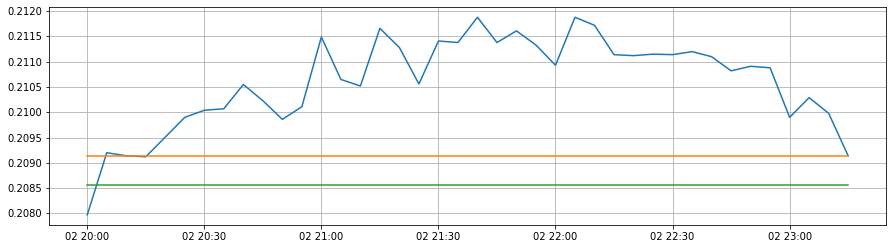

In [111]:
ext_mean = np.mean([S[0], S[-1]])
plt.figure(figsize=(15, 4))
plt.plot(index, S)
plt.plot(index, [S[-1] for i in range(len(S))])
plt.plot(index, [ext_mean for i in range(len(S))])
plt.grid()

In [12]:
S[0], S[-1]

(0.20913, 0.20979)

In [198]:
len(S)/5

40.2

In [91]:
test_serie(S) #18:03

[4, 29] 4/35 0.11428571428571428


(0,
 array([0.20914, 0.20912, 0.20951, 0.2099 , 0.21004, 0.21007, 0.21055,
        0.21023, 0.20986, 0.21011, 0.21149, 0.21065, 0.21052, 0.21166,
        0.21128, 0.21056, 0.21141, 0.21138, 0.21188, 0.21138, 0.21161,
        0.21133, 0.21093, 0.21188, 0.21172, 0.21114, 0.21112, 0.21115,
        0.21114, 0.2112 , 0.2111 , 0.21082, 0.21091, 0.21088, 0.2099 ]),
 'up')

In [96]:
test_serie(S) #18:13

[6, 30] 6/37 0.16216216216216217


(0,
 array([0.20914, 0.20912, 0.20951, 0.2099 , 0.21004, 0.21007, 0.21055,
        0.21023, 0.20986, 0.21011, 0.21149, 0.21065, 0.21052, 0.21166,
        0.21128, 0.21056, 0.21141, 0.21138, 0.21188, 0.21138, 0.21161,
        0.21133, 0.21093, 0.21188, 0.21172, 0.21114, 0.21112, 0.21115,
        0.21114, 0.2112 , 0.2111 , 0.21082, 0.21091, 0.21088, 0.2099 ,
        0.21029, 0.20998]),
 'up')

In [103]:
test_serie(S) #18:18

[0, 35] 0/36 0.0


(1,
 array([0.20951, 0.2099 , 0.21004, 0.21007, 0.21055, 0.21023, 0.20986,
        0.21011, 0.21149, 0.21065, 0.21052, 0.21166, 0.21128, 0.21056,
        0.21141, 0.21138, 0.21188, 0.21138, 0.21161, 0.21133, 0.21093,
        0.21188, 0.21172, 0.21114, 0.21112, 0.21115, 0.21114, 0.2112 ,
        0.2111 , 0.21082, 0.21091, 0.21088, 0.2099 , 0.21029, 0.20998,
        0.20914]),
 'up')

In [109]:
test_serie(S) #18:18 | 41

[2, 36] 2/40 0.05


(1,
 array([0.20797, 0.2092 , 0.20914, 0.20912, 0.20951, 0.2099 , 0.21004,
        0.21007, 0.21055, 0.21023, 0.20986, 0.21011, 0.21149, 0.21065,
        0.21052, 0.21166, 0.21128, 0.21056, 0.21141, 0.21138, 0.21188,
        0.21138, 0.21161, 0.21133, 0.21093, 0.21188, 0.21172, 0.21114,
        0.21112, 0.21115, 0.21114, 0.2112 , 0.2111 , 0.21082, 0.21091,
        0.21088, 0.2099 , 0.21029, 0.20998, 0.20914]),
 'up')

In [83]:
test_serie(S)

[5, 35] 5/41 0.12195121951219512


(0,
 array([0.20912, 0.20951, 0.2099 , 0.21004, 0.21007, 0.21055, 0.21023,
        0.20986, 0.21011, 0.21149, 0.21065, 0.21052, 0.21166, 0.21128,
        0.21056, 0.21141, 0.21138, 0.21188, 0.21138, 0.21161, 0.21133,
        0.21093, 0.21188, 0.21172, 0.21114, 0.21112, 0.21115, 0.21114,
        0.2112 , 0.2111 , 0.21082, 0.21091, 0.21088, 0.2099 , 0.21029,
        0.20998, 0.20914, 0.20908, 0.20917, 0.2098 , 0.20965]),
 'up')

In [81]:
test_serie(S)

[4, 37] 4/41 0.0975609756097561


(1,
 array([0.20912, 0.20951, 0.2099 , 0.21004, 0.21007, 0.21055, 0.21023,
        0.20986, 0.21011, 0.21149, 0.21065, 0.21052, 0.21166, 0.21128,
        0.21056, 0.21141, 0.21138, 0.21188, 0.21138, 0.21161, 0.21133,
        0.21093, 0.21188, 0.21172, 0.21114, 0.21112, 0.21115, 0.21114,
        0.2112 , 0.2111 , 0.21082, 0.21091, 0.21088, 0.2099 , 0.21029,
        0.20998, 0.20914, 0.20908, 0.20917, 0.2098 , 0.20965]),
 'up')

In [174]:
ext_mean = np.mean([S[0], S[-1]])
min_vals = S[S<ext_mean]
max_vals = S[S>ext_mean]
balance = [min_vals.shape[0], max_vals.shape[0]]
evaluar = f"{min_vals.shape[0]}/{S.shape[0]}"
print(evaluar)
metrica = eval(evaluar)
metrica

25/201


0.12437810945273632

In [110]:
ext_mean = np.mean([S[0], S[-1]])
min_vals = S[S<ext_mean]
max_vals = S[S>ext_mean]
balance = [min_vals.shape[0], max_vals.shape[0]]
evaluar = f"{min_vals.shape[0]}/{S.shape[0]}"
print(evaluar)
metrica = eval(evaluar)
metrica

1/40


0.025

In [160]:
metrica

0.12437810945273632